In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

pd.set_option('display.precision', 2)

In [5]:
df = pd.read_csv('../../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [6]:
df['Churn'] = df['Churn'].astype('int64')
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [7]:
df.describe(include = ['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [18]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [19]:
df['Churn'].value_counts(normalize = True)

0    0.86
1    0.14
Name: Churn, dtype: float64

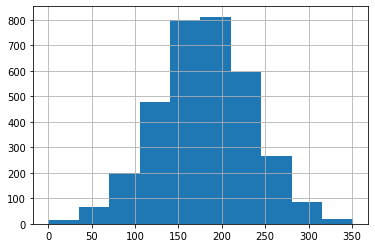

In [22]:
df['Total day minutes'].hist()

In [10]:
import pandas_profiling
import webbrowser

In [11]:
df_profile = df.copy()

In [13]:
profile = pandas_profiling.ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [16]:
df.sort_values(by = ['Churn', 'Total day charge'], ascending = [True, False])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,NH,117,510,Yes,No,0,54.2,100,9.21,303.2,84,25.77,171.8,84,7.73,8.6,2,2.32,1,1
2173,KS,47,510,Yes,No,0,47.8,120,8.13,178.9,123,15.21,152.6,96,6.87,13.3,7,3.59,0,1
2158,FL,166,510,Yes,No,0,47.7,89,8.11,264.4,95,22.47,235.2,97,10.58,13.2,3,3.56,0,1
1531,DE,138,510,Yes,No,0,46.5,104,7.91,186.0,114,15.81,167.5,95,7.54,9.6,4,2.59,4,1


In [19]:
df['Churn'].mean()

0.14491449144914492

In [21]:
df[df['Churn'] == 1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


In [22]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [23]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [24]:
df[df['Churn'] == 1].describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.0
mean,102.66,437.82,5.12,206.91,101.34,35.18,212.41,100.56,18.05,205.23,100.40,9.24,10.70,4.16,2.89,2.23,1.0
std,39.47,42.79,11.86,69.00,21.58,11.73,51.73,19.72,4.40,47.13,19.95,2.12,2.79,2.55,0.75,1.85,0.0
min,1.00,408.00,0.00,0.00,0.00,0.00,70.90,48.00,6.03,47.40,49.00,2.13,2.00,1.00,0.54,0.00,1.0
25%,76.00,408.00,0.00,153.25,87.50,26.05,177.10,87.00,15.05,171.25,85.00,7.71,8.80,2.00,2.38,1.00,1.0
50%,103.00,415.00,0.00,217.60,103.00,36.99,211.30,101.00,17.96,204.80,100.00,9.22,10.60,4.00,2.86,2.00,1.0
75%,127.00,510.00,0.00,265.95,116.50,45.21,249.45,114.00,21.20,239.85,115.00,10.79,12.80,5.00,3.46,4.00,1.0
max,225.00,510.00,48.00,350.80,165.00,59.64,363.70,168.00,30.91,354.90,158.00,15.97,20.00,20.00,5.40,9.00,1.0


In [25]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

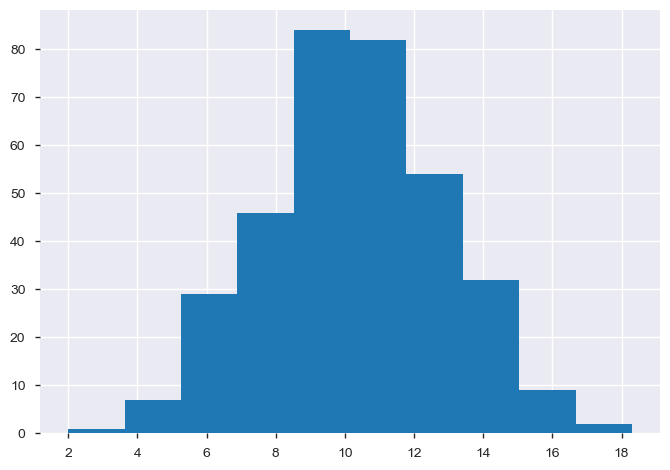

In [27]:
df[(df['Churn'] == 1) & (df['International plan'] == 'No')]['Total intl minutes'].hist()

In [28]:
df[df['State'].apply(lambda st: st[0] =='W')]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,No,No,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2,0
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,0
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [29]:
d = {'No': False , 'Yes': True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [34]:
columns_to_show = ['Total day minutes','Total eve minutes','Total night minutes']
df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [36]:
df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.max, np.min])

Total day minutes                    Total eve minutes                \
                   mean    std   amax amin              mean    std   amax   
Churn                                                                        
0                175.18  50.18  315.6  0.0            199.04  50.29  361.8   
1                206.91  69.00  350.8  0.0            212.41  51.73  363.7   

            Total night minutes                      
       amin                mean    std   amax  amin  
Churn                                                
0       0.0              200.13  51.11  395.0  23.2  
1      70.9              205.23  47.13  354.9  47.4

In [39]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize = True)

Voice mail plan,No,Yes
Churn,,
0,0.60,0.25
1,0.12,0.02


In [40]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],['Area code'], aggfunc = 'mean' )

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [42]:
pd.crosstab(df['Churn'], df['International plan'], margins = True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

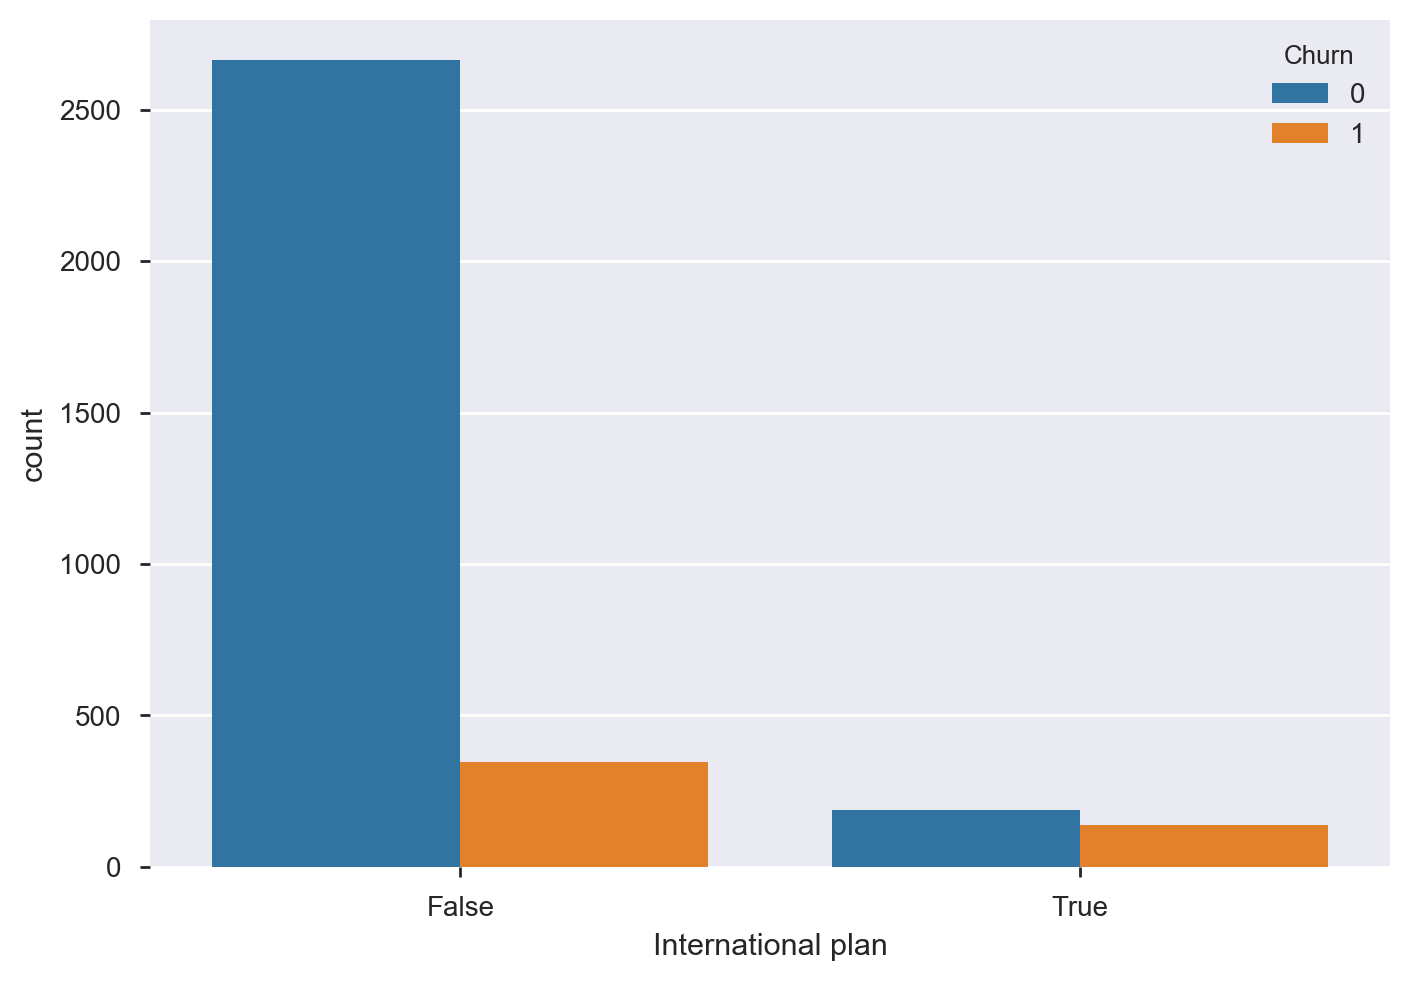

In [44]:
sns.countplot(x = 'International plan', hue = 'Churn', data = df)

In [45]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins = True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


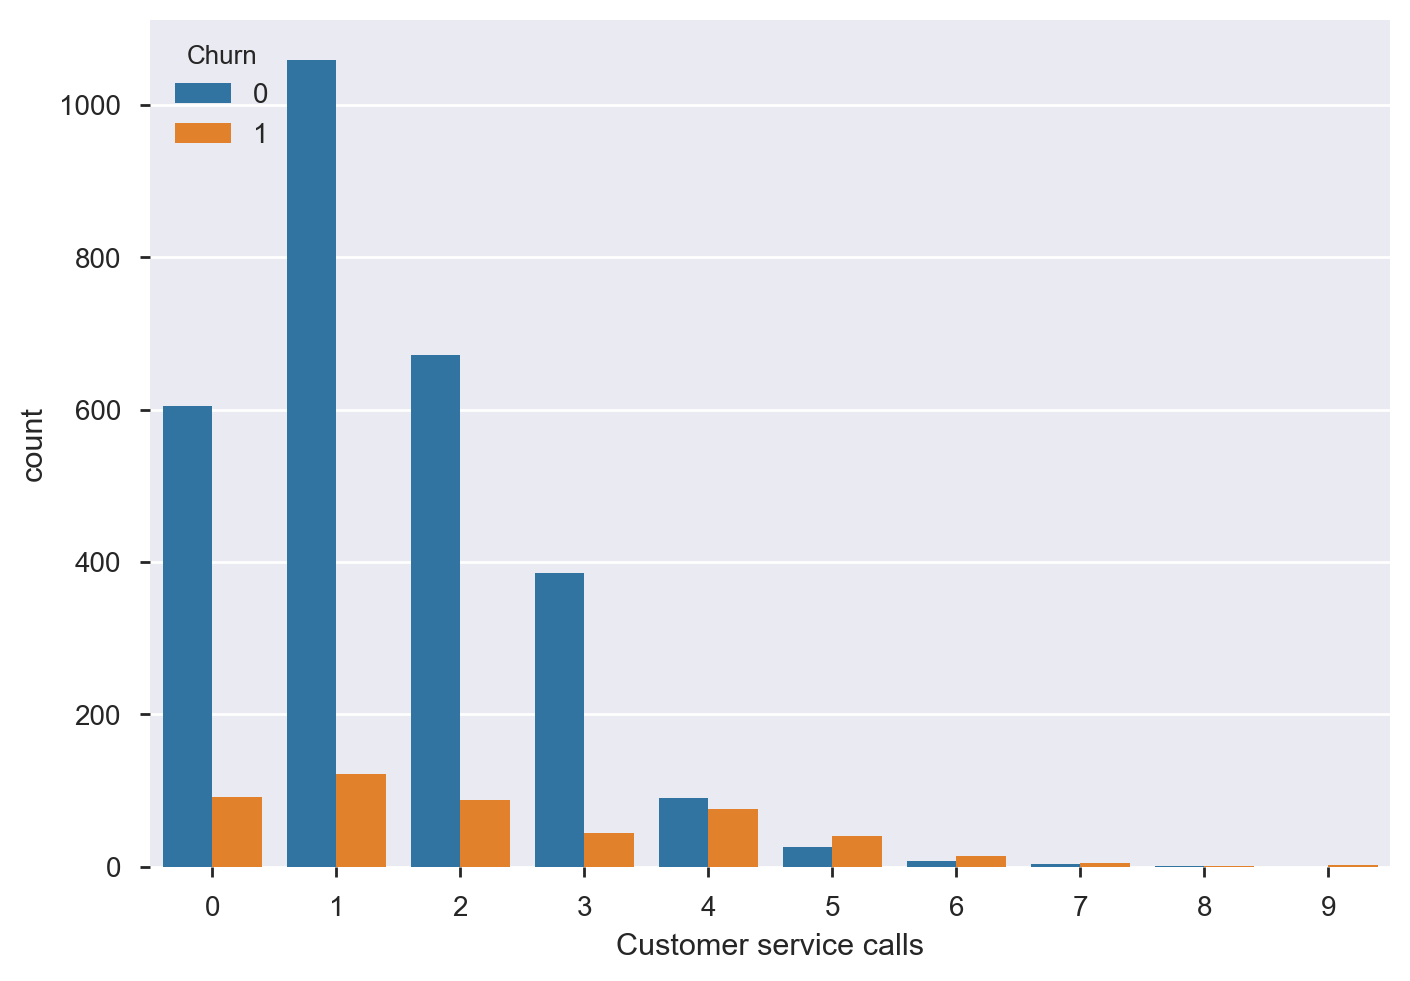

In [46]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df)

In [48]:
df['Many service calls'] = (df['Customer service calls'] > 3).astype('int')

In [50]:
pd.crosstab(df['Many service calls'], df['Churn'], margins =True)

Churn,0,1,All
Many service calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


In [52]:
pd.crosstab(df['International plan'] & df['Many service calls'] , df['Churn'], margins = True)

Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


In [53]:
df = pd.read_csv('../../data/house_prices_train.csv')

In [54]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

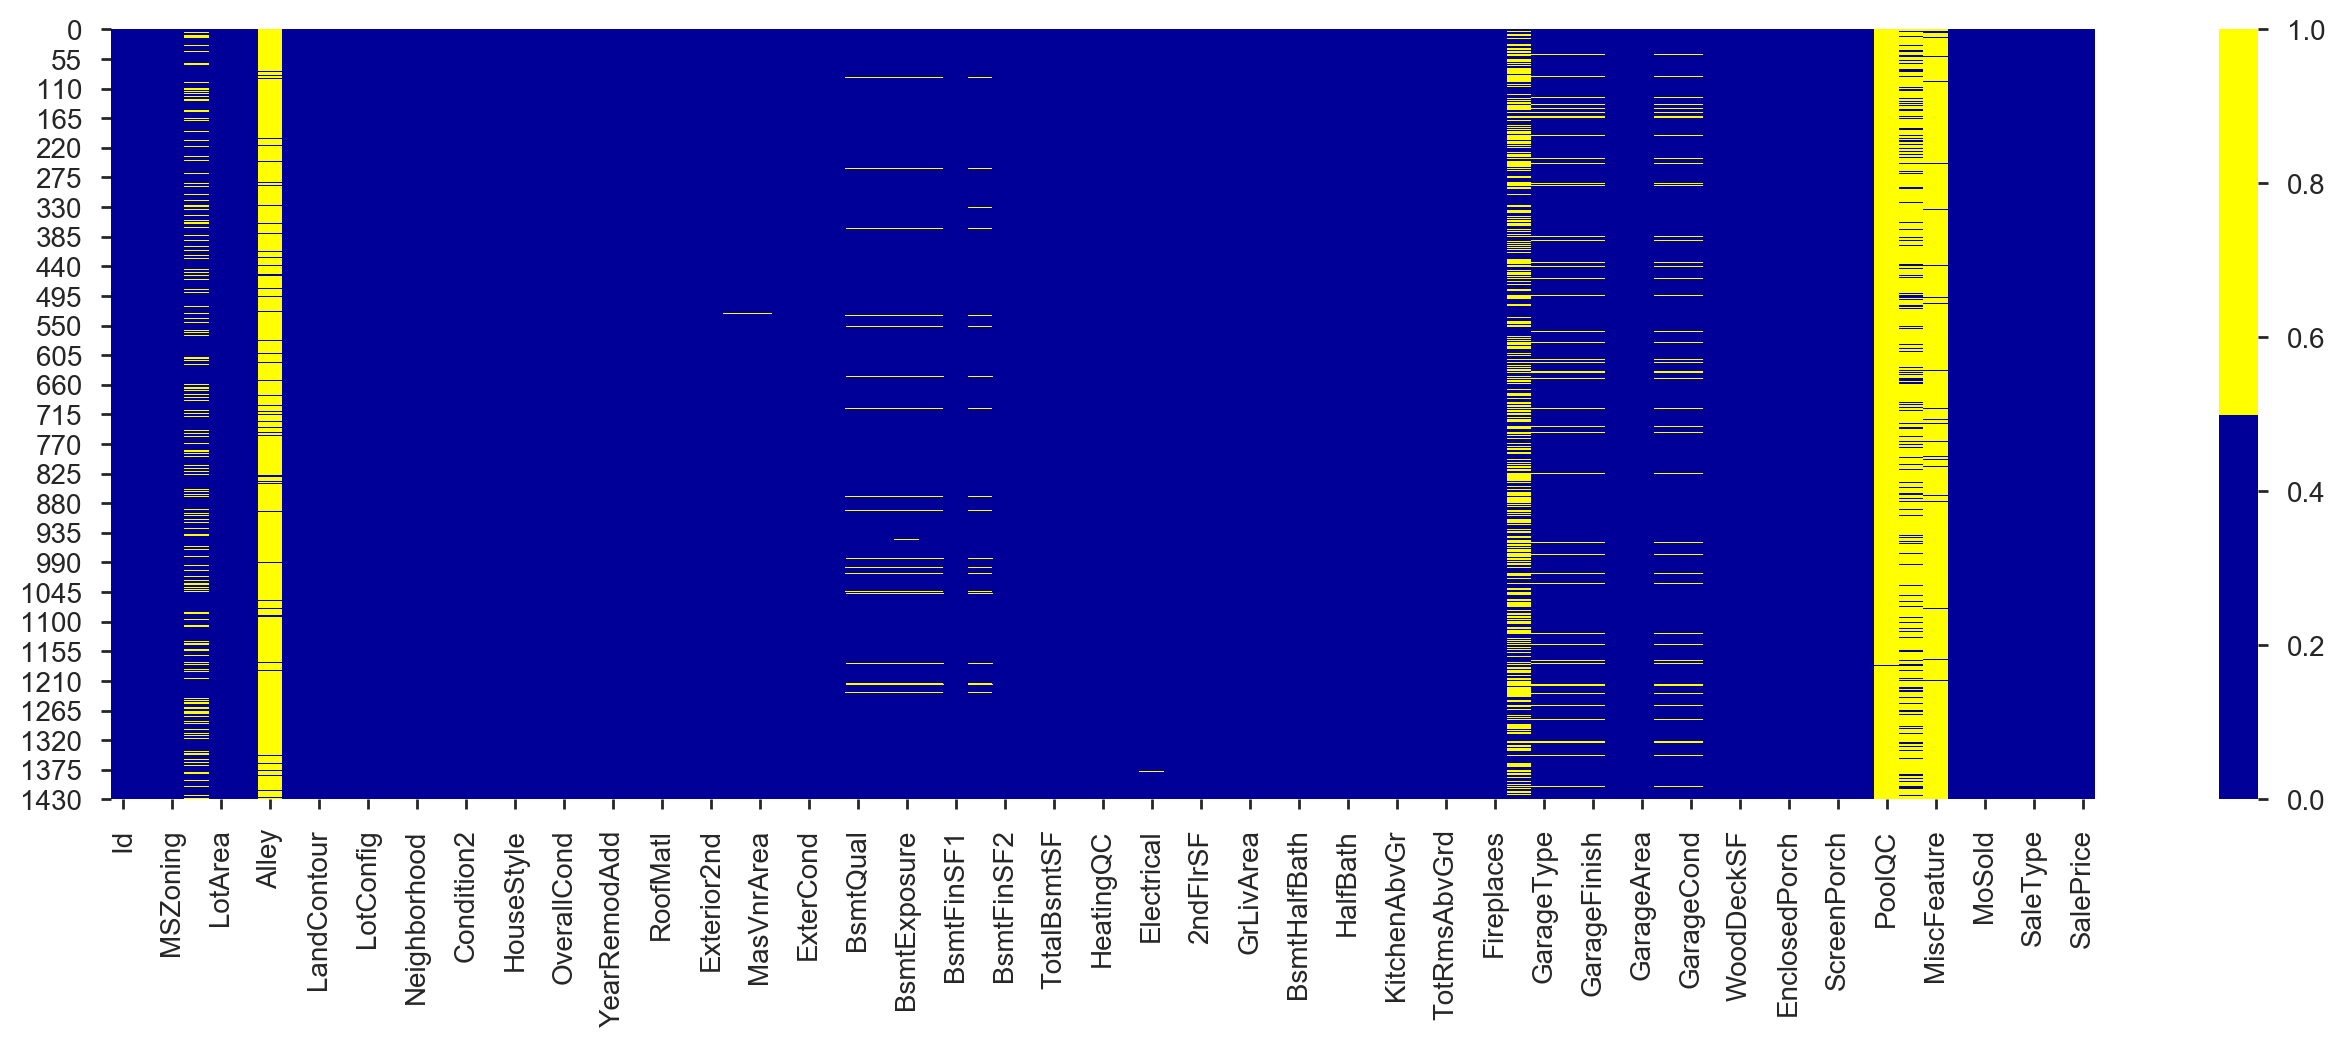

In [60]:
cols = df.columns
colors = ['#000099', '#ffff00']

plt.subplots(figsize = (16,5))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [63]:
for column in cols:
    pct_missing = np.mean(df[column].isnull())
    if pct_missing > 0.05:
        print('{} - \t{}%'.format(column, round(pct_missing*100)))

LotFrontage - 	18.0%
Alley - 	94.0%
FireplaceQu - 	47.0%
GarageType - 	6.0%
GarageYrBlt - 	6.0%
GarageFinish - 	6.0%
GarageQual - 	6.0%
GarageCond - 	6.0%
PoolQC - 	100.0%
Fence - 	81.0%
MiscFeature - 	96.0%


In [64]:
ind_missing = df[df.GarageType.isnull()].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [65]:
df['GarageType'] = df['GarageType'].fillna('_MISSING_')

# numeric
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-999)

In [66]:
df['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

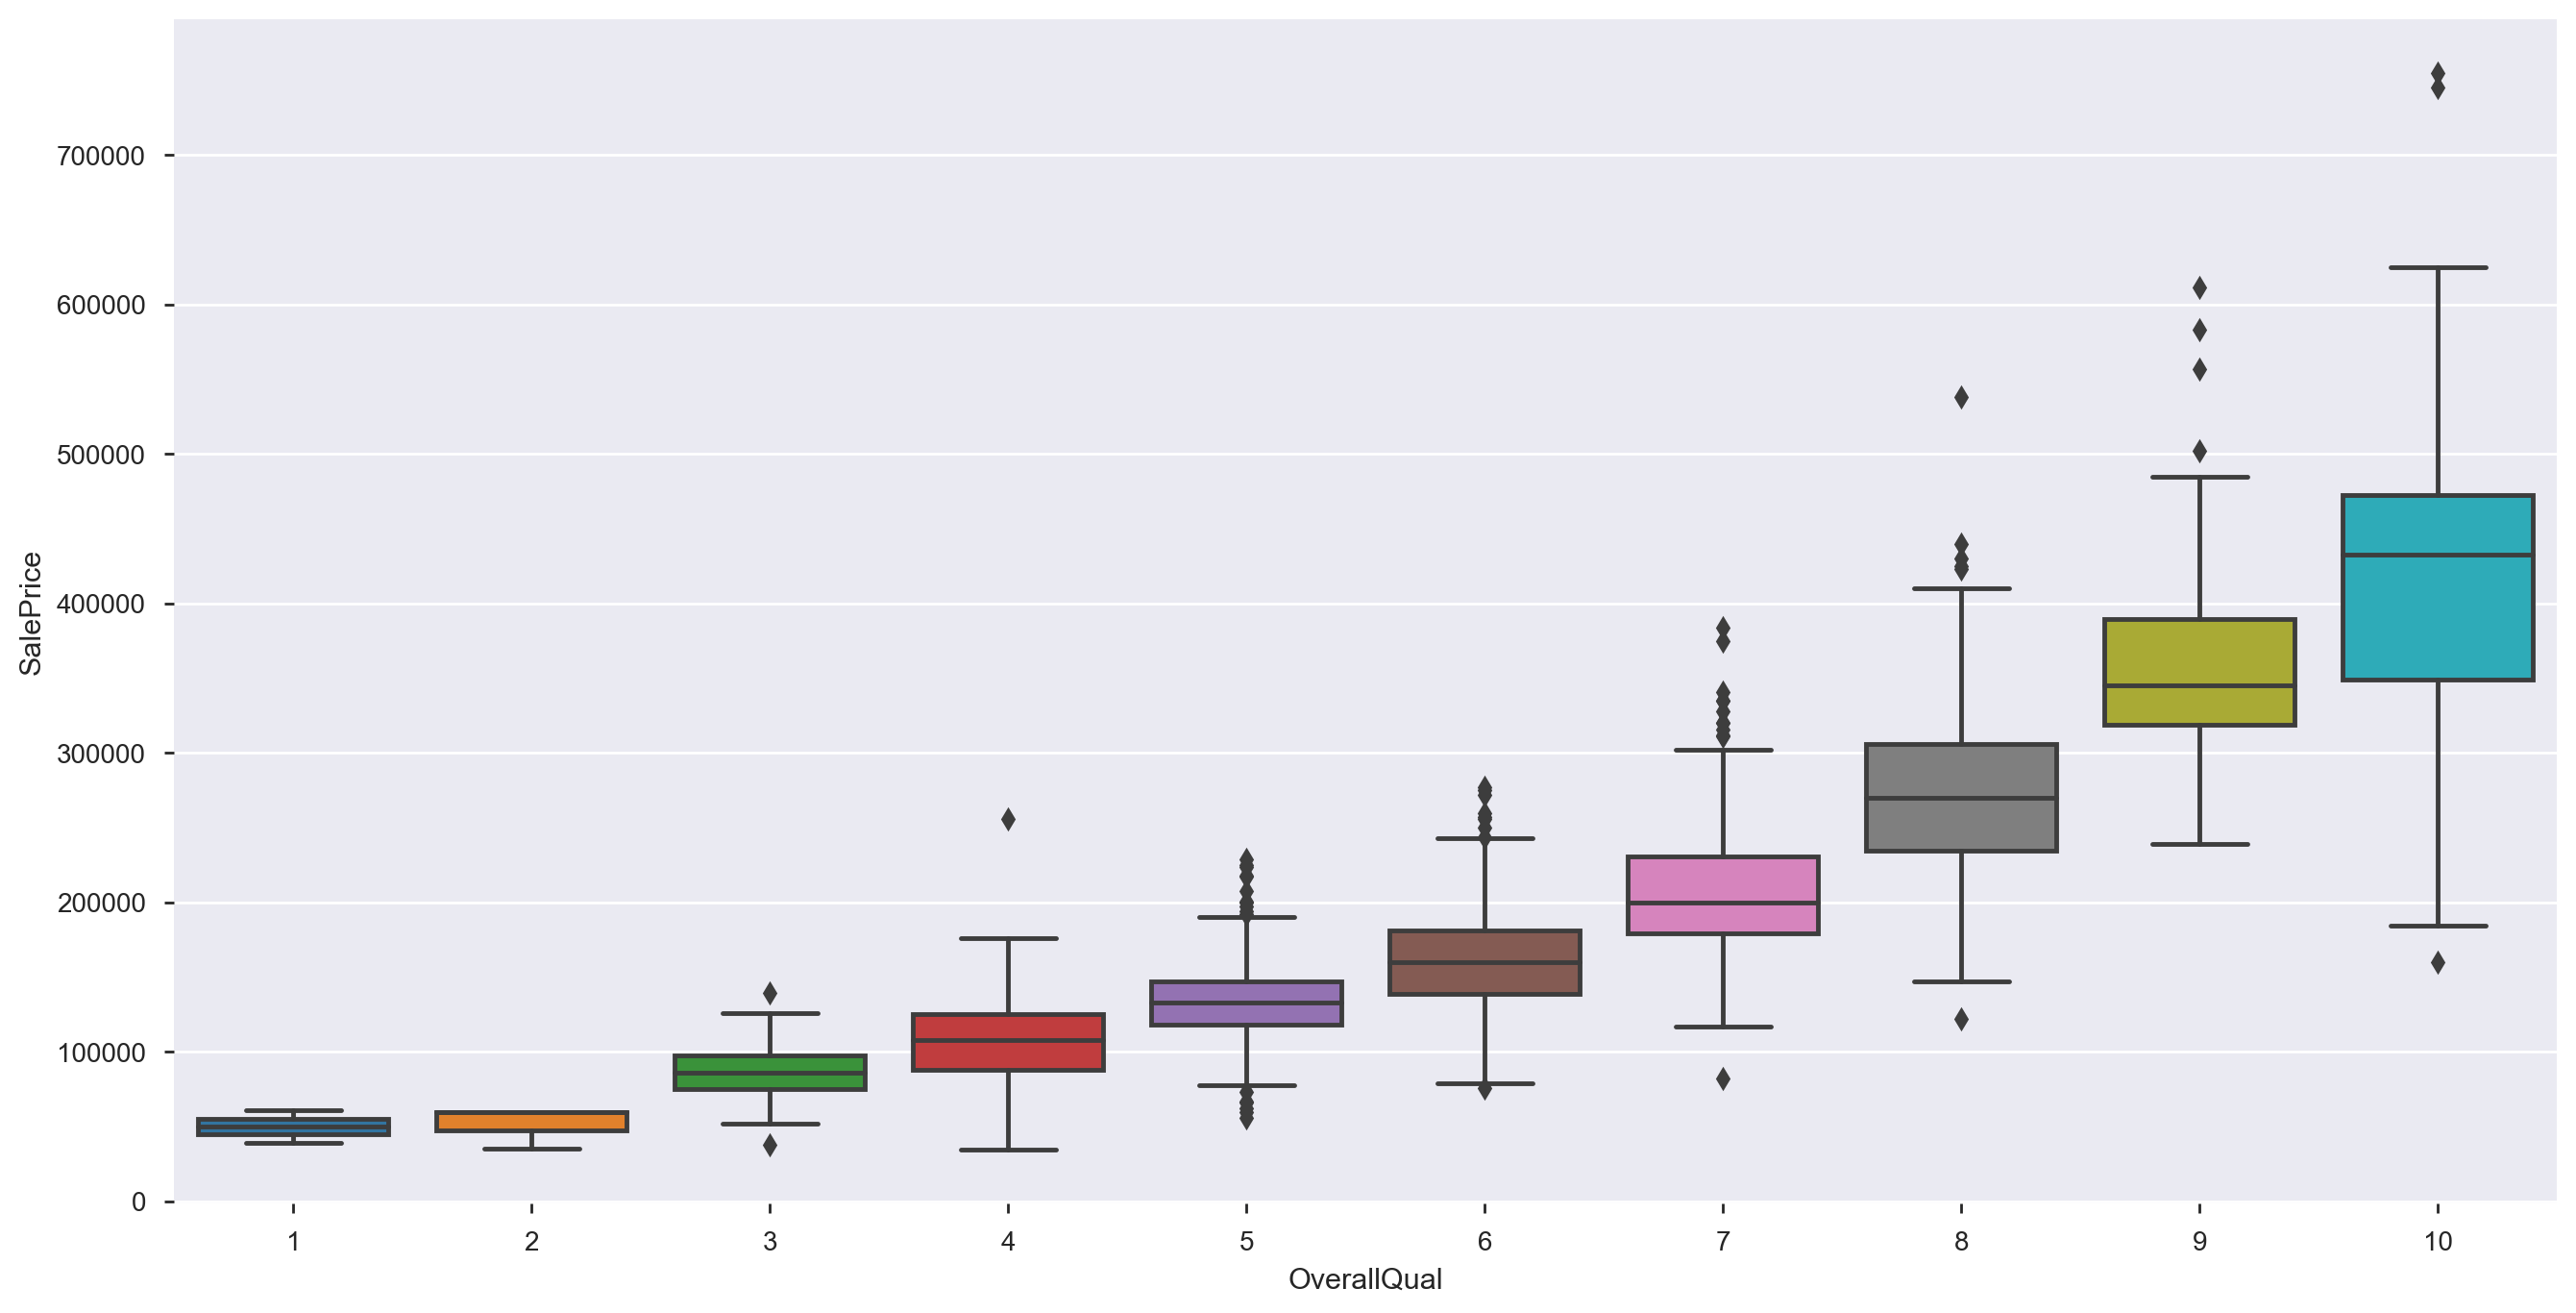

In [67]:
plt.subplots(figsize = (16,8))
sns.boxplot(x=df.OverallQual, y='SalePrice', data=df)

In [69]:
df[df['OverallQual']==4]['SalePrice'].describe()

count       116.00
mean     108420.66
std       29022.00
min       34900.00
25%       88000.00
50%      108000.00
75%      125500.00
max      256000.00
Name: SalePrice, dtype: float64

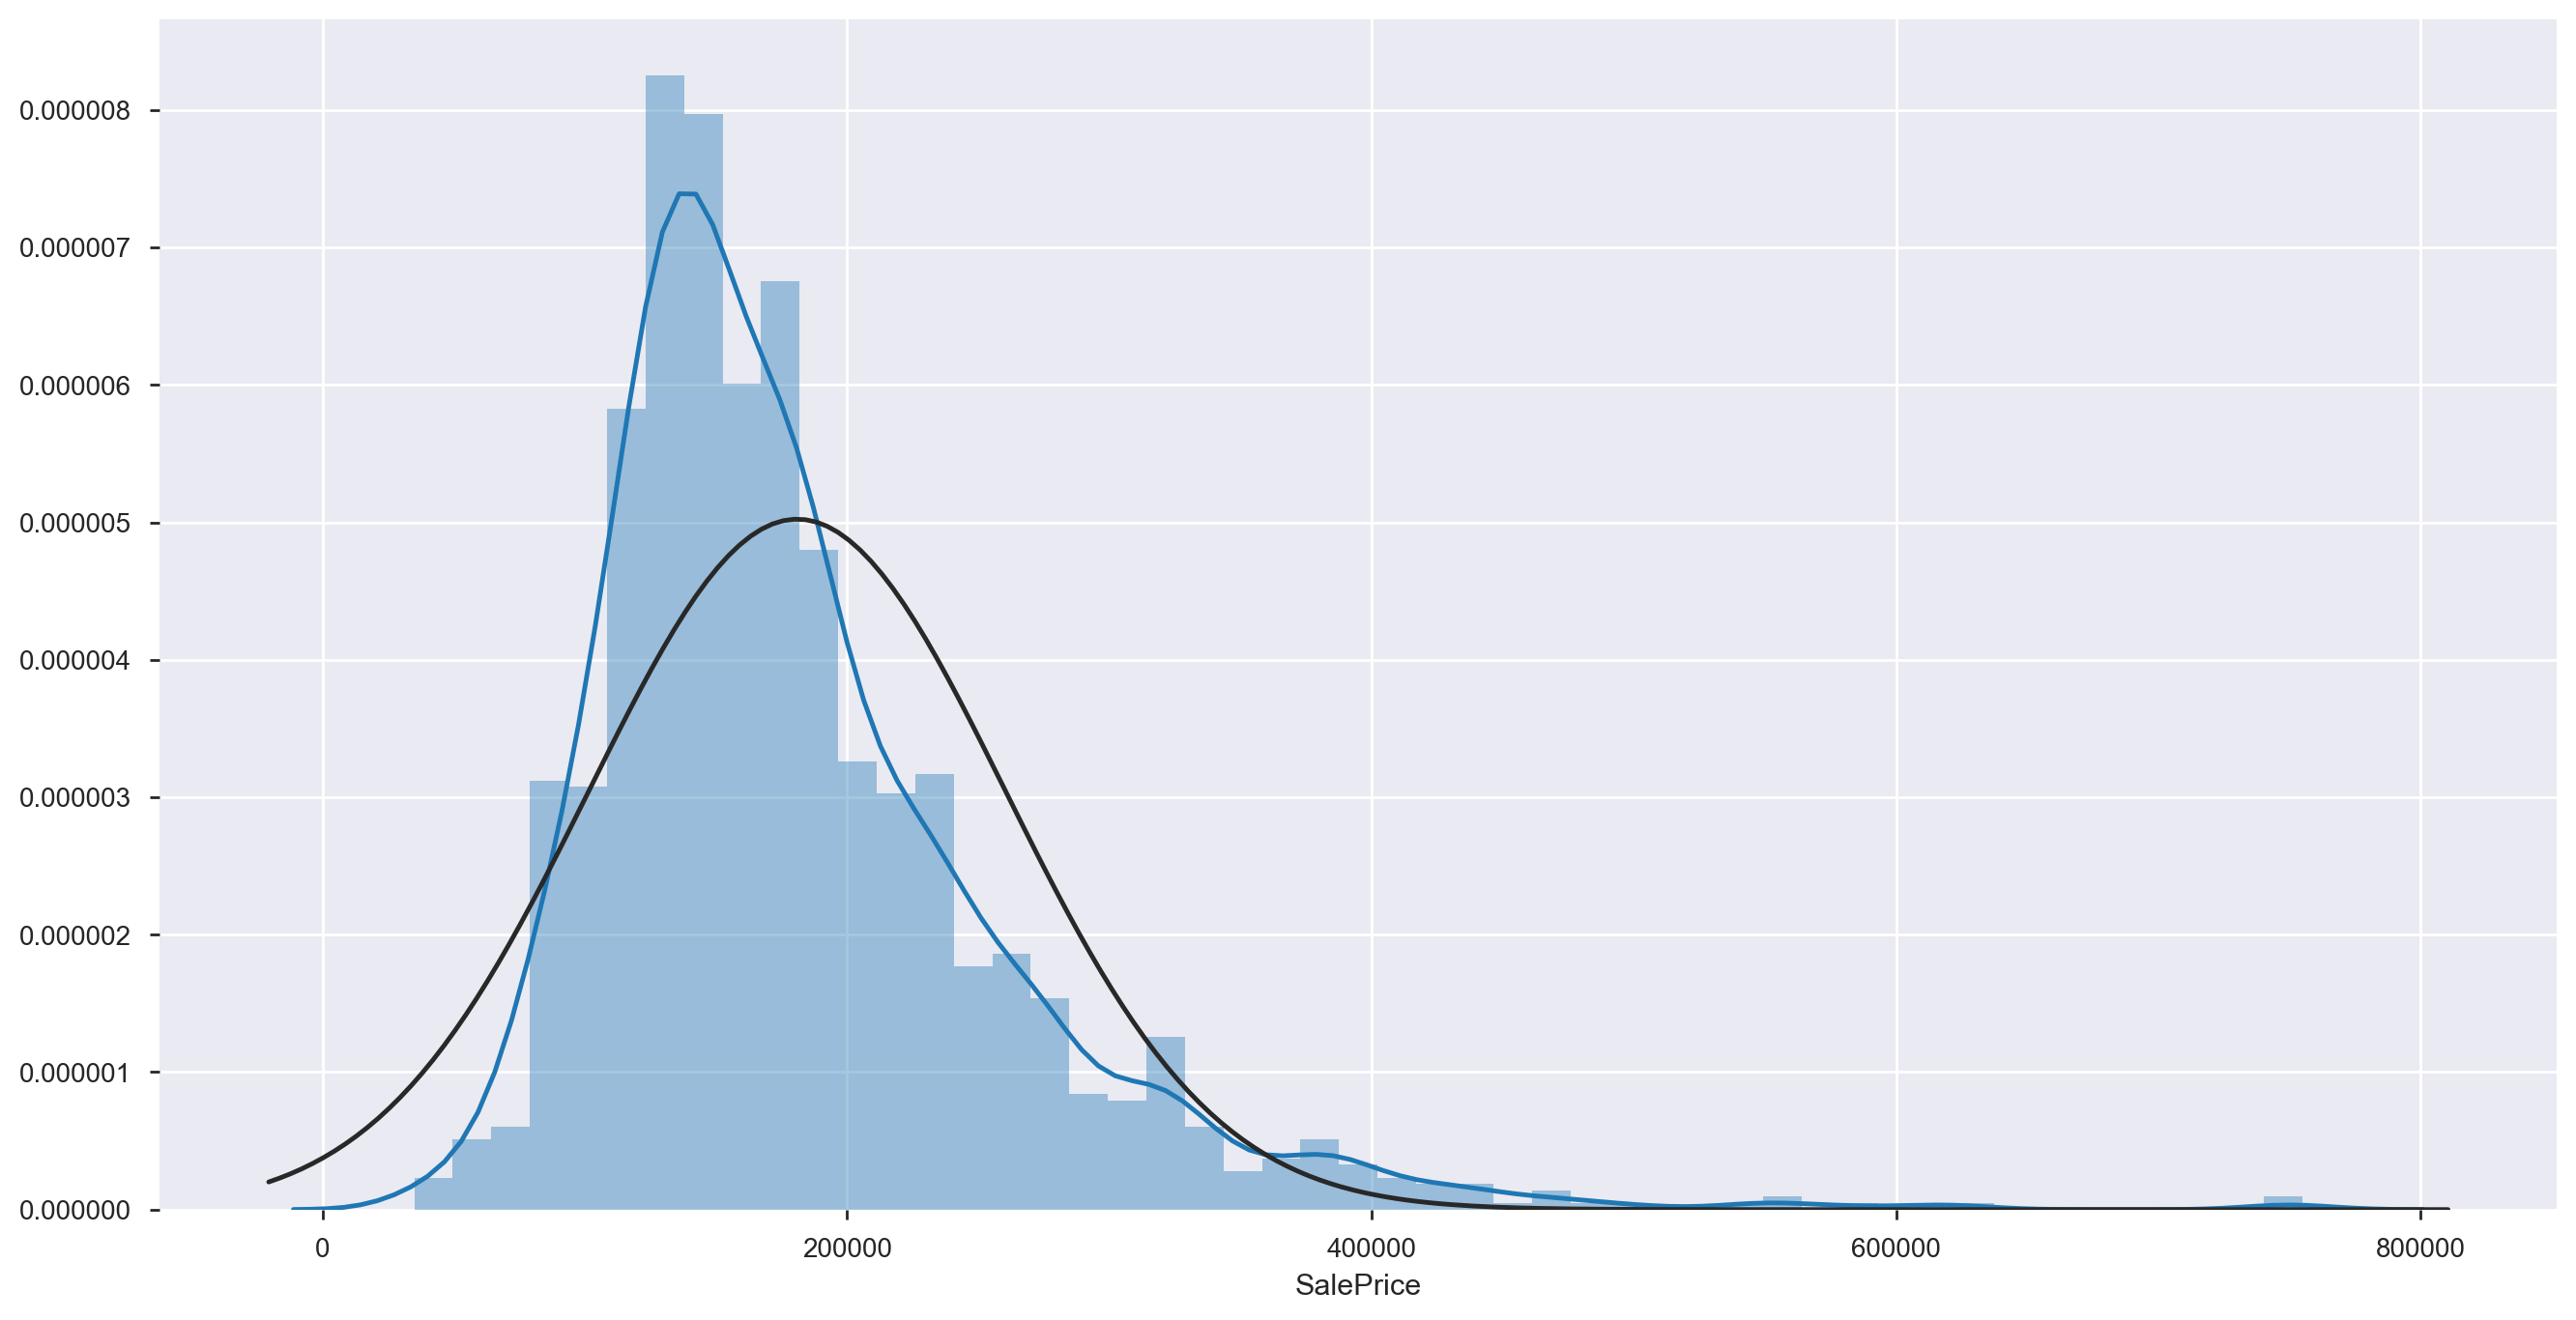

In [71]:
from scipy.stats import norm

plt.subplots(figsize = (16,8))
sns.distplot(df['SalePrice'], fit =norm)

In [72]:
df["SalePrice_Normal"] = np.log(df['SalePrice'])

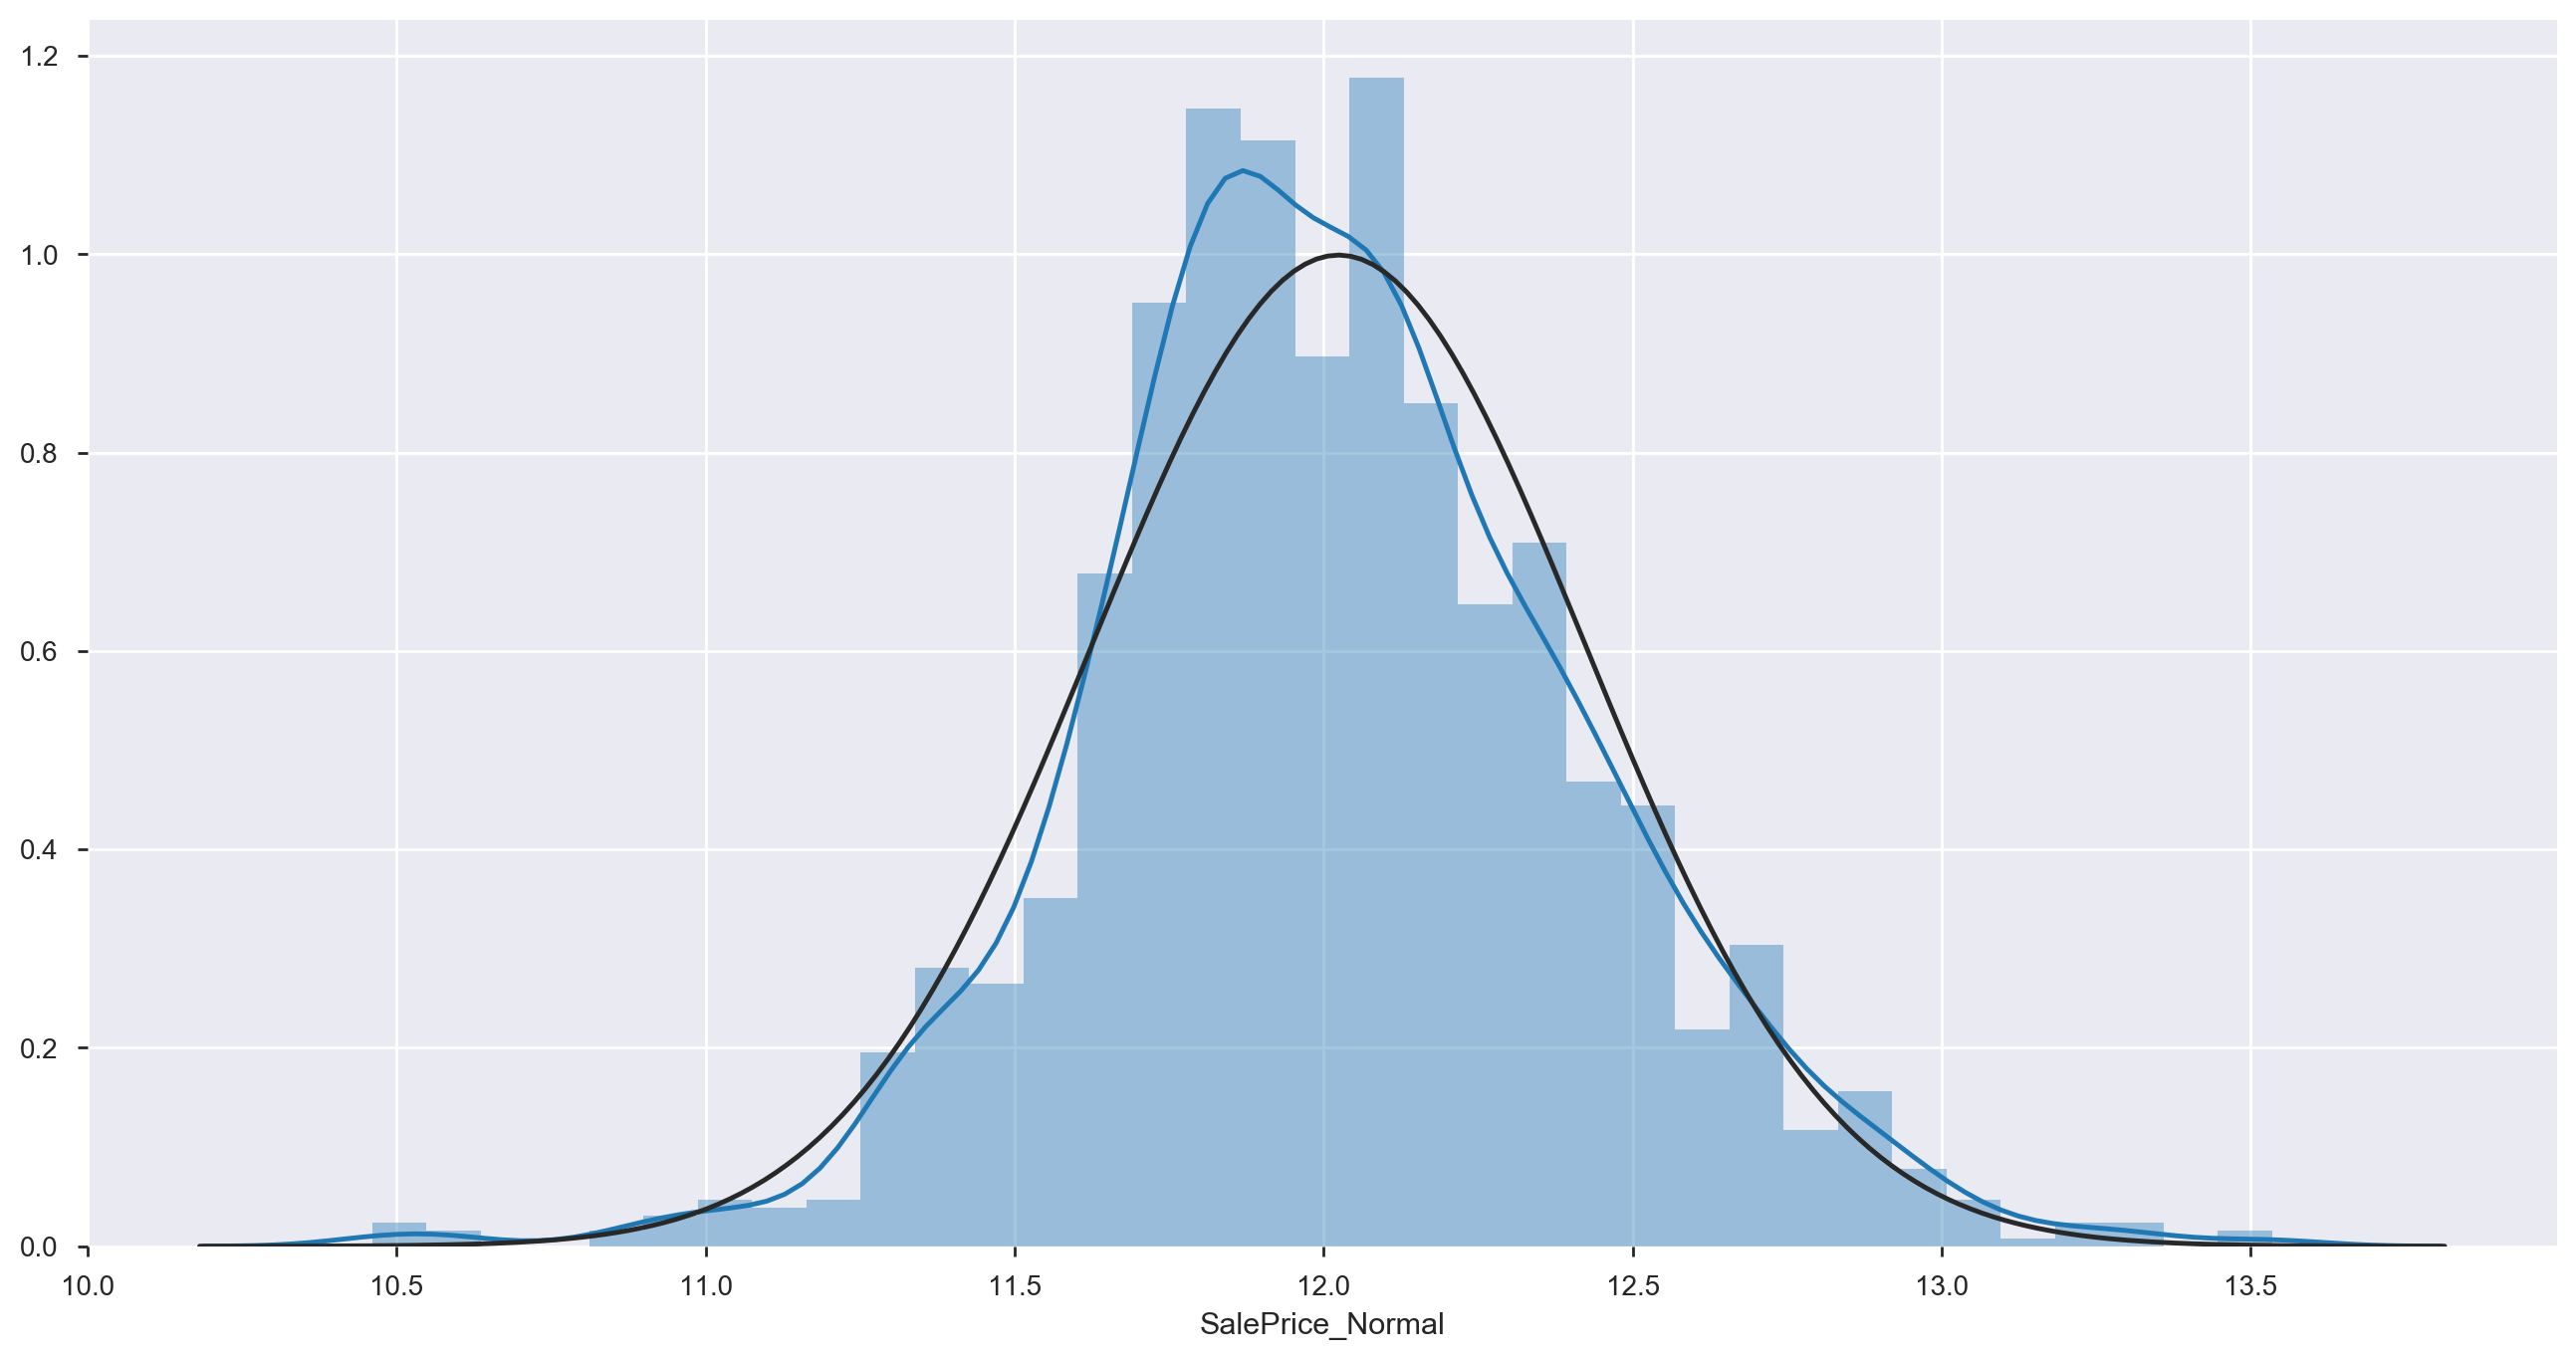

In [73]:
plt.subplots(figsize=(16, 8))
sns.distplot(df["SalePrice_Normal"], fit=norm)

In [75]:
num_rows =len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna = False)
    top_pct = (cnts/num_rows).iloc[0]
    


1460